Machine learning coursework2

Before starting, read the README.txt file.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Simple Linear Regression  (30 points)

### Background

Remember from the course material: In Linear Regression, we aim to find the line that fits the given data as well as possible. The line formula is:

### <center> $ \hat{y} = f(x) = \beta_0 + \beta_1 x $ <center> 

And using linear regression, the goal is to find the $\beta_0$ and $\beta_1$ such that the the Mean Squared Error (MSE) is minimized:
    
### <center> $ MSE \Rightarrow \mathcal{L} = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i ))^2 $ <center> 
    
As the MSE error gets smaller, the line starts to represent the data better and better.
    
Consider $\beta = (\beta_0 + \beta_1)$. In order to find the $\beta$ that minimizes the MSE loss, we use **Gradient Descent**. Iteratively $\beta$ is updated in the opposite direction of the gradient, while the size of the update is controlled with the learning rate $\eta$:
    
### <center> $ \beta \leftarrow \beta-\eta \frac{d \mathcal{L}}{d \beta} $ <center> 

### Your Task

In this part, you are going to code up Simple Linear Regression on the data given in **data1.csv**, and find the line that fits the data best. To do so, you'll need to complete the following:

- Code up the gradient descent, and print the loss value at every time step. You can use the number of steps as the stopping criteria (e.g. stopping gradient descent after 10 steps). 
- At the end of the algorithm, plot the obtained regression line with the data .
    
I recommend you to use the given learning rate and number of iterations in the code , but you are free to change them to make your algorithm faster if you'd like. You are not allowed to use any libraries other than the imported ones at the beginning. You can initialize the $\beta$ randomly.

In [12]:
def load_data():
    df = pd.read_csv("data1.csv")
    x = df['x'].values
    y = df['y'].values
    return x, y


def gradient_descent(x, y, learning_rate = 0.1, max_its = 500):
    #TO DO: Initialize the beta values
    beta0 = 0
    beta1 = 0

    # start gradient descent loop
    for k in range(0,max_its):
        # TO DO: calculate derivative (grad)
        # derivative w.r.t beta0
        grad0 = -2 * np.mean(y - beta0 - beta1 * x)

        # derivative w.r.t beta1
        grad1 = -2 * np.mean((y - beta0 - beta1 * x)* x)
               
        
        # TO DO: take gradient descent step
        beta0 = beta0 -learning_rate * grad0 
        beta1 = beta1 - learning_rate * grad1
        
        
        # TO DO: calculate and print the loss value
        loss = np.mean((y - beta0 - beta1)**2)
        print(f"Iteration {k+1}; loss = {loss:.4f}")

    return beta0, beta1

Iteration 1; loss = 1.4952
Iteration 2; loss = 0.7324
Iteration 3; loss = 0.3415
Iteration 4; loss = 0.1544
Iteration 5; loss = 0.0764
Iteration 6; loss = 0.0547
Iteration 7; loss = 0.0601
Iteration 8; loss = 0.0772
Iteration 9; loss = 0.0979
Iteration 10; loss = 0.1181
Iteration 11; loss = 0.1363
Iteration 12; loss = 0.1519
Iteration 13; loss = 0.1648
Iteration 14; loss = 0.1754
Iteration 15; loss = 0.1840
Iteration 16; loss = 0.1909
Iteration 17; loss = 0.1965
Iteration 18; loss = 0.2010
Iteration 19; loss = 0.2046
Iteration 20; loss = 0.2076
Iteration 21; loss = 0.2101
Iteration 22; loss = 0.2122
Iteration 23; loss = 0.2140
Iteration 24; loss = 0.2155
Iteration 25; loss = 0.2169
Iteration 26; loss = 0.2181
Iteration 27; loss = 0.2192
Iteration 28; loss = 0.2202
Iteration 29; loss = 0.2212
Iteration 30; loss = 0.2220
Iteration 31; loss = 0.2229
Iteration 32; loss = 0.2237
Iteration 33; loss = 0.2245
Iteration 34; loss = 0.2252
Iteration 35; loss = 0.2260
Iteration 36; loss = 0.2267
I

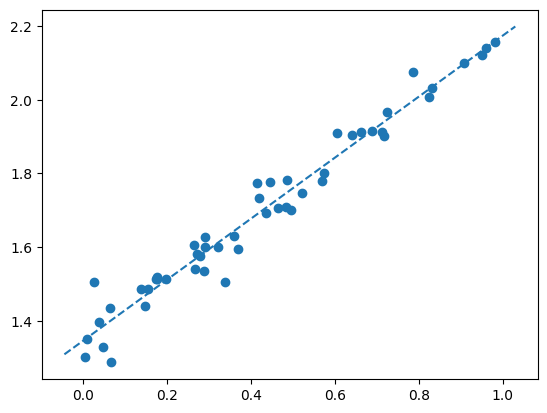

In [13]:
x, y = load_data()
beta0, beta1 = gradient_descent(x, y)
plt.scatter(x, y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta0 + beta1 * x_vals
plt.plot(x_vals, y_vals, '--')
plt.show()


# Part 2: Multi Linear Regression on California House Pricing Dataset using 5-fold Cross Validation (50 points)

In this part, you are going to train a Multi Linear Regression Model on a real dataset! The dataset we are going to use is **California House Pricing Dataset**. The target is to predict the median house value in California, given the 8 features ( You can examine the name of the features when you run the load_data function given below ). In this part, you will also use Cross-Validation with 5 folds, in addition to everything you implemented in Part 1. You will also alter your code so that it works with multiple attribute. In this case, you will have 8 features and you can code up assuming you will always have 8 features. At the end, you will report your results. 

In summary, you will need to do the following:

- Code up gradient descent with Cross Validation for Multi Linear Regression
- Find the best working learning rate and number of iterations setup.
- Report the MSE loss periodically during training in folds (For example, if you are training for 1000 steps, you can print MSE loss for each 100 steps. If you are training for 100000 steps ( which you can, if you'd like ), you can print MSE loss for each 10000 steps. In total, if you print the loss 10 times periodically for each fold, it's fine ).
- Save the final MSE results on the testing set on each fold in an array. Print the average testing MSE losses at the end of the algorithm. Additionally, print the variance of the testing MSE losses. 

In this part, I am giving you only the load_data function, It is up to you to find the working learning rate and number of iterations setup. In addition to the libraries imported for Part 1, you are allowed to use sklearn for fetching dataset (which is already done for you), and the KFold class for the cross-validation. Other than that, you are not allowed to use sklearn or any other additional libraries.



In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
def load_data():
    data= fetch_california_housing()
    print("Features of Boston Housing Prices dataset: ", data.get("feature_names"))
    print("Shape of the X: ", data.data.shape)
    print("Shape of the Y: ", data.target.shape)
    return data.data, data.target


def multiple_gradient_descent_KFold(x, y, learning_rate=0.001, max_its=1000, k=5):
    x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

    # Initialize beta values
    beta = np.zeros(x.shape[1] + 1)

    # Adding a column of ones to x for the intercept term
    x = np.c_[np.ones(x.shape[0]), x]

    # Initialize the KFold object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Array to store the testing MSE losses for each fold
    test_mse_losses = []

    for i, (train_index, test_index) in enumerate(kf.split(x)):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Gradient descent loop
        for j in range(max_its):
            y_pred = x_train.dot(beta)
            grad = -2 * x_train.T.dot(y_train - y_pred) / x_train.shape[0]
            beta = beta - learning_rate * grad

            if (j + 1) % (max_its // 10) == 0:
                train_mse_loss = np.mean((y_train - y_pred) ** 2)
                print(f"Fold {i + 1}, iteration {j + 1}: training MSE loss = {train_mse_loss:.4f}")
                test_mse_loss = np.mean((y_test - x_test.dot(beta)) ** 2)
                print(f"Fold {i + 1}, Testing MSE loss = {test_mse_loss:.4f}")
                test_mse_losses.append(test_mse_loss)
    
    # Print the average and variance of the testing MSE losses over all folds
    print(f"Average testing MSE loss = {np.mean(test_mse_losses):.4f}")
    print(f"Variance of testing MSE loss = {np.var(test_mse_losses):.4f}")

In [15]:
x, y = load_data()
multiple_gradient_descent_KFold(x, y)

Features of Boston Housing Prices dataset:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape of the X:  (20640, 8)
Shape of the Y:  (20640,)
Fold 1, iteration 100: training MSE loss = 3.9876
Fold 1, Testing MSE loss = 3.9118
Fold 1, iteration 200: training MSE loss = 2.8784
Fold 1, Testing MSE loss = 2.8298
Fold 1, iteration 300: training MSE loss = 2.1369
Fold 1, Testing MSE loss = 2.1066
Fold 1, iteration 400: training MSE loss = 1.6403
Fold 1, Testing MSE loss = 1.6224
Fold 1, iteration 500: training MSE loss = 1.3070
Fold 1, Testing MSE loss = 1.2976
Fold 1, iteration 600: training MSE loss = 1.0828
Fold 1, Testing MSE loss = 1.0793
Fold 1, iteration 700: training MSE loss = 0.9316
Fold 1, Testing MSE loss = 0.9321
Fold 1, iteration 800: training MSE loss = 0.8292
Fold 1, Testing MSE loss = 0.8327


Fold 1, iteration 900: training MSE loss = 0.7595
Fold 1, Testing MSE loss = 0.7651
Fold 1, iteration 1000: training MSE loss = 0.7118
Fold 1, Testing MSE loss = 0.7189
Fold 2, iteration 100: training MSE loss = 0.6786
Fold 2, Testing MSE loss = 0.6904
Fold 2, iteration 200: training MSE loss = 0.6563
Fold 2, Testing MSE loss = 0.6665
Fold 2, iteration 300: training MSE loss = 0.6403
Fold 2, Testing MSE loss = 0.6493
Fold 2, iteration 400: training MSE loss = 0.6287
Fold 2, Testing MSE loss = 0.6368
Fold 2, iteration 500: training MSE loss = 0.6200
Fold 2, Testing MSE loss = 0.6274
Fold 2, iteration 600: training MSE loss = 0.6134
Fold 2, Testing MSE loss = 0.6202
Fold 2, iteration 700: training MSE loss = 0.6082
Fold 2, Testing MSE loss = 0.6145
Fold 2, iteration 800: training MSE loss = 0.6039
Fold 2, Testing MSE loss = 0.6099
Fold 2, iteration 900: training MSE loss = 0.6003
Fold 2, Testing MSE loss = 0.6060
Fold 2, iteration 1000: training MSE loss = 0.5971
Fold 2, Testing MSE loss